### **EXPLORATORY DATA ANALISYS**

#### **ALTIERIS M. PEIXOTO**

A partir da definição do tema do trabalho, desenvolva uma análise exploratória inicial sobre os dados.  
As análises podem seguir as estratégias disponibilizadas pelos professores no Moodle, mas precisam apresentar os insights encontrados para os dados do seu problema.

Elabore um documento descrevendo sua análise exploratória usando elementos visuais adequados.  

**O documento deve conter:**

1. Descrição das fontes de dados  
2. Descrição das principais variáveis (features)  
3. Análises iniciais de distribuição e/ou correlação com gráficos adequados  
4. Conclusões/ideias/hipóteses iniciais  


#### **1. Descrição das fontes de dados**

No contexto de Cidades Inteligentes, um dos tópicos emergententes é o transporte público e como este influencia diretamente no dia a dia da população.  
Através dos dados disponibilizados pela URBS - Urbanização de Curitiba através do site http://dadosabertos.c3sl.ufpr.br/curitibaurbs/ espera-se ter uma melhor idéia da qualidade do transporte público na região de Curitiba.

O presente trabalho tem como proposta realizar uma breve análise exploratória dos dados disponíveis no site, assim como gerar insights para a evolução do trabalho final da displina.

#### **2. Descrição das principais variáveis (features)**

Os dados são disponibilizados diáriamente no portal de dados abertos, entretanto são sempre referentes ao dia anterior e em formato JSON.  

Foi realizada uma coleta dos dados de 01/01/2019 à 31/03/2019 e foi utilizado o [Apache Spark](https://spark.apache.org/) para o processamento das informações.  

**OBS:** Foi realizado uma filtragem nos dados para análise do dia 14-03-2019

#### **INIT SPARK CONTEXT AND SET CONFIGURATIONS**

In [1]:
import findspark
findspark.init()

In [2]:
import pyspark
import random
from pyspark.conf import SparkConf
from pyspark.context import SparkContext
from pyspark.sql import SQLContext

conf = SparkConf().setAppName("App")
conf = (conf.setMaster('local[*]')
        .set('spark.executor.memory', '6G')
        .set('spark.driver.memory', '15G')
        .set('spark.driver.maxResultSize', '10G'))

sc = SparkContext.getOrCreate(conf=conf)
sqlContext = SQLContext(sc)

#### **LOAD DATA FILES**

In [3]:
processed_path = '/home/altieris/datascience/data/curitibaurbs/processed/'

In [4]:
linhas = sqlContext.read.parquet(processed_path+'linhas/')
linhas.registerTempTable("linhas")

In [5]:
pontosLinha = sqlContext.read.parquet(processed_path+'pontoslinha/')
pontosLinha.registerTempTable("pontos_linha")

In [6]:
tabelaVeiculo = sqlContext.read.parquet(processed_path+'tabelaveiculo/')
tabelaVeiculo.registerTempTable("tabela_veiculo")

In [7]:
tabelaLinha = sqlContext.read.parquet(processed_path+'tabelalinha/')
tabelaLinha.registerTempTable("tabela_linha")

In [8]:
trechosItinerarios = sqlContext.read.parquet(processed_path+'trechositinerarios/')
trechosItinerarios.registerTempTable("trechos_itinerarios")

In [9]:
categoriasOnibus = trechosItinerarios.select('COD_CATEGORIA','NOME_CATEGORIA').distinct()
categoriasOnibus.registerTempTable("categorias_onibus")

In [10]:
tipoItinerarios = trechosItinerarios.select('COD_ITINERARIO','NOME_ITINERARIO').distinct()
tipoItinerarios.registerTempTable("tipos_itinerarios")

In [11]:
empresasOnibus = trechosItinerarios.select("COD_EMPRESA","NOME_EMPRESA").distinct()
empresasOnibus.registerTempTable("empresas_onibus")

In [12]:
position_events = sqlContext.read.parquet(processed_path+'veiculos/')
position_events.registerTempTable("veiculos")

#### **SHOW DATA**

In [13]:
def executeQuery(table_name):
    query = 'select * from {} limit 10'.format(table_name)
    
    return sqlContext.sql(query)

#### **Linhas de ônibus**

Todas as linhas da Rede Integrada do Transporte Coletivo de Curitiba.

In [14]:
executeQuery('linhas').toPandas().head(10)

,CATEGORIA_SERVICO,COD,NOME,NOME_COR,SOMENTE_CARTAO,filepath,filename,year,month,day
0,CONVENCIONAL,464,A. MUNHOZ / J. BOTANICO,AMARELA,S,file:///home/altieris/datascience/data/curitib...,2019_03_06_linhas.json,2019,03,06
1,ALIMENTADOR,226,ABAETE,LARANJA,N,file:///home/altieris/datascience/data/curitib...,2019_03_06_linhas.json,2019,03,06
2,TRONCAL,182,ABRANCHES,AMARELA,N,file:///home/altieris/datascience/data/curitib...,2019_03_06_linhas.json,2019,03,06
3,ALIMENTADOR,332,ACROPOLE,LARANJA,N,file:///home/altieris/datascience/data/curitib...,2019_03_06_linhas.json,2019,03,06
4,ALIMENTADOR,334,AGRICOLA,LARANJA,N,file:///home/altieris/datascience/data/curitib...,2019_03_06_linhas.json,2019,03,06
5,CONVENCIONAL,265,AHU / LOS ANGELES,AMARELA,S,file:///home/altieris/datascience/data/curitib...,2019_03_06_linhas.json,2019,03,06
6,CONVENCIONAL,560,ALFERES POLI,AMARELA,S,file:///home/altieris/datascience/data/curitib...,2019_03_06_linhas.json,2019,03,06
7,ALIMENTADOR,232,ALIANCA,LARANJA,N,file:///home/altieris/datascience/data/curitib...,2019_03_06_linhas.json,2019,03,06
8,ALIMENTADOR,629,ALTO BOQUEIR?O,LARANJA,N,file:///home/altieris/datascience/data/curitib...,2019_03_06_linhas.json,2019,03,06
9,TRONCAL,373,ALTO TARUM?,AMARELA,N,file:///home/altieris/datascience/data/curitib...,2019_03_06_linhas.json,2019,03,06


#### **Pontos de ônibus**

Todos os pontos da linha.

In [15]:
executeQuery('pontos_linha').toPandas().head(10)

,COD,GRUPO,ITINERARY_ID,LAT,LON,NOME,NUM,SENTIDO,SEQ,TIPO,filepath,filename,year,month,day
0,010,,481,-25.422482678274,-49.284327553297,"Av. Manoel Ribas, 531 - Merces",110037,Horario,39,Novo mobiliario,file:///home/altieris/datascience/data/curitib...,2019_03_20_pontosLinha.json,2019,03,20
1,010,,481,-25.432681513162,-49.258593202776,"Av. Visc. de Guarapuava, 1692 - Centro",140204,Horario,11,Novo mobiliario,file:///home/altieris/datascience/data/curitib...,2019_03_20_pontosLinha.json,2019,03,20
2,010,,481,-25.432206677422,-49.292185860119,"R. Cap. Souza Franco, 661 - Bigorrilho",180042,Horario,34,Novo mobiliario,file:///home/altieris/datascience/data/curitib...,2019_03_20_pontosLinha.json,2019,03,20
3,011,,482,-25.442672993214,-49.288137735075,"Av. do Batel, 1614 - Batel",180067,Anti-horario,21,Novo mobiliario,file:///home/altieris/datascience/data/curitib...,2019_03_20_pontosLinha.json,2019,03,20
4,011,,482,-25.450261873841,-49.259898163195,"Rua Rockefeller, 1424 - Prado Velho",140265,Anti-horario,31,Novo mobiliario,file:///home/altieris/datascience/data/curitib...,2019_03_20_pontosLinha.json,2019,03,20
5,011,,482,-25.44981,-49.27953,"Rua Alferes Angelo Sampaio, 262 - Agua Verde",150222,Anti-horario,25,Novo mobiliario,file:///home/altieris/datascience/data/curitib...,2019_03_20_pontosLinha.json,2019,03,20
6,011,,482,-25.431270813559,-49.254113440476,"R. Jose de Alencar, 361 - Alto da Rua Quinze",110027,Anti-horario,39,Novo mobiliario,file:///home/altieris/datascience/data/curitib...,2019_03_20_pontosLinha.json,2019,03,20
7,011,,482,-25.42337,-49.25315,"Rua Jose de Alencar, 1391 - Alto da Rua XV",130232,Anti-horario,42,Novo mobiliario,file:///home/altieris/datascience/data/curitib...,2019_03_20_pontosLinha.json,2019,03,20
8,011,,482,-25.416890336817,-49.252919504299,"Rua Augusto Stresser, 908 - Juveve",130234,Anti-horario,44,Novo mobiliario,file:///home/altieris/datascience/data/curitib...,2019_03_20_pontosLinha.json,2019,03,20
9,011,,482,-25.413472422663,-49.281147930059,"R. Dom Alberto Goncalves, 951 - Bom Retiro",120109,Anti-horario,6,Novo mobiliario,file:///home/altieris/datascience/data/curitib...,2019_03_20_pontosLinha.json,2019,03,20


#### **Tabela de horários de cada ônibus**

O número da tabela horária que o veículo executou.

In [16]:
executeQuery('tabela_veiculo').toPandas().head(10)

,COD_LINHA,COD_PONTO,HORARIO,NOME_LINHA,TABELA,VEICULO,filepath,filename,year,month,day
0,509,,00:00,MAD. BOQUEIR?O,1,KB499,file:///home/altieris/datascience/data/curitib...,2019_03_19_tabelaVeiculo.json,2019,03,19
1,519,,00:05,MAD. S. FRANCISCO / IGUAPE,1,EA183,file:///home/altieris/datascience/data/curitib...,2019_03_19_tabelaVeiculo.json,2019,03,19
2,509,,00:05,MAD. BOQUEIR?O,1,KB499,file:///home/altieris/datascience/data/curitib...,2019_03_19_tabelaVeiculo.json,2019,03,19
3,608,,00:05,MAD. PINHEIRINHO,1,HA258,file:///home/altieris/datascience/data/curitib...,2019_03_19_tabelaVeiculo.json,2019,03,19
4,209,,00:10,MAD. S. CANDIDA / C. RASO,1,BI877,file:///home/altieris/datascience/data/curitib...,2019_03_19_tabelaVeiculo.json,2019,03,19
5,519,,00:30,MAD. S. FRANCISCO / IGUAPE,1,EA183,file:///home/altieris/datascience/data/curitib...,2019_03_19_tabelaVeiculo.json,2019,03,19
6,209,,00:30,MAD. S. CANDIDA / C. RASO,1,BI877,file:///home/altieris/datascience/data/curitib...,2019_03_19_tabelaVeiculo.json,2019,03,19
7,209,,00:30,MAD. S. CANDIDA / C. RASO,2,HI853,file:///home/altieris/datascience/data/curitib...,2019_03_19_tabelaVeiculo.json,2019,03,19
8,509,,00:30,MAD. BOQUEIR?O,1,KB499,file:///home/altieris/datascience/data/curitib...,2019_03_19_tabelaVeiculo.json,2019,03,19
9,608,,00:35,MAD. PINHEIRINHO,1,HA258,file:///home/altieris/datascience/data/curitib...,2019_03_19_tabelaVeiculo.json,2019,03,19


#### **Tabela horária de cada linha**

Tabela horária de cada linha.

In [17]:
executeQuery('tabela_linha').toPandas().head()

,ADAPT,COD,DIA,HORA,NUM,PONTO,TABELA,filepath,filename,year,month,day
0,,340,1,06:58,109120,TERMINAL BAIRRO ALTO,1-1,file:///home/altieris/datascience/data/curitib...,2019_02_14_tabelaLinha.json,2019,02,14
1,,340,1,07:09,109025,TUBO DETRAN (SENTIDO CENTRO),1-1,file:///home/altieris/datascience/data/curitib...,2019_02_14_tabelaLinha.json,2019,02,14
2,,340,1,07:19,109120,TERMINAL BAIRRO ALTO,1-1,file:///home/altieris/datascience/data/curitib...,2019_02_14_tabelaLinha.json,2019,02,14
3,,340,1,07:32,109025,TUBO DETRAN (SENTIDO CENTRO),1-1,file:///home/altieris/datascience/data/curitib...,2019_02_14_tabelaLinha.json,2019,02,14
4,,340,1,07:43,109120,TERMINAL BAIRRO ALTO,1-1,file:///home/altieris/datascience/data/curitib...,2019_02_14_tabelaLinha.json,2019,02,14


#### **Tabela de trechos dos itinerários de cada linha**

Trechos dos itinerários das linhas.

In [18]:
executeQuery('trechos_itinerarios').drop('CODIGO_URBS','NOME_EMPRESA','NOME_CATEGORIA','NOME_LINHA','NOME_ITINERARIO','STOP_NAME','TIPO_TRECHO').toPandas().head()

,COD_CATEGORIA,COD_EMPRESA,COD_ITINERARIO,COD_LINHA,COD_PTO_PARADA_TH,COD_PTO_TRECHO_A,COD_PTO_TRECHO_B,EXTENSAO_TRECHO_A_ATE_B,NOME_PTO_ABREVIADO,NOME_PTO_PARADA_TH,PTO_ESPECIAL,SEQ_PONTO_TRECHO_A,SEQ_PONTO_TRECHO_B,SEQ_PTO_ITI_TH,STOP_CODE,filepath,filename,year,month,day
0,5,004,909,340,806,806,488,3.148,B.ALTO,TERMINAL BAIRRO ALTO,N,5688,5689,5688,109120,file:///home/altieris/datascience/data/curitib...,2019_01_20_trechosItinerarios.json,2019,01,20
1,5,004,909,340,908,908,806,3.203,DETRAN/BAI,TUBO DETRAN (SENTIDO BAIRRO),N,5900,5688,5900,109024,file:///home/altieris/datascience/data/curitib...,2019_01_20_trechosItinerarios.json,2019,01,20
2,5,004,909,340,806,806,908,4.197,B.ALTO,TERMINAL BAIRRO ALTO,N,5688,5900,5688,109120,file:///home/altieris/datascience/data/curitib...,2019_01_20_trechosItinerarios.json,2019,01,20
3,5,004,909,340,488,488,806,3.162,DETRAN/CEN,TUBO DETRAN (SENTIDO CENTRO),S,5689,5688,5689,109025,file:///home/altieris/datascience/data/curitib...,2019_01_20_trechosItinerarios.json,2019,01,20
4,1,011,676,616,1192,1192,1193,5.86,PORTAO-FAN,PORTAO-LINHA VERDE(SENT.FANNY),N,5014,5015,5014,105807,file:///home/altieris/datascience/data/curitib...,2019_01_20_trechosItinerarios.json,2019,01,20


#### **Categorias de ônibus**

In [19]:
executeQuery('categorias_onibus').toPandas().head()

,COD_CATEGORIA,NOME_CATEGORIA
0,27,LIGEIR?O
1,8,CONVENCIONAL
2,6,TRONCAL
3,12,CIRCULAR CENTRO
4,15,MADRUGUEIRO


#### **Empresas de transporte público**

In [20]:
 executeQuery('empresas_onibus').toPandas().head(15)

,COD_EMPRESA,NOME_EMPRESA
0,009,ARAUCARIA/TRANSBUS
1,010,MERCES/PONTUAL
2,011,SORRISO/PIONEIRO
3,003,GLORIA/PONTUAL
4,002,TAMANDARE/PIONEIRO
5,005,CCD/PIONEIRO
6,007,REDENTOR/TRANSBUS
7,008,EXPRESSO AZUL/TRANSBUS
8,004,SANTO ANTONIO/PONTUAL
9,006,S?O JOSE/PIONEIRO


#### **Dados de rastreamento dos ônibus**

In [21]:
executeQuery('veiculos').toPandas().head()

,COD_LINHA,DTHR,LAT,LON,VEIC,_corrupt_record,filepath,filename,year,month,day
0,979,08/02/2019 20:02:59,-25.42484,-49.301046,MT010,None,file:///home/altieris/datascience/data/curitib...,2019_02_10_veiculos.json,2019,02,10
1,979,08/02/2019 20:02:55,-25.424595,-49.301226,MT010,None,file:///home/altieris/datascience/data/curitib...,2019_02_10_veiculos.json,2019,02,10
2,979,08/02/2019 20:02:51,-25.424485,-49.301555,MT010,None,file:///home/altieris/datascience/data/curitib...,2019_02_10_veiculos.json,2019,02,10
3,979,08/02/2019 20:02:47,-25.42427,-49.301771,MT010,None,file:///home/altieris/datascience/data/curitib...,2019_02_10_veiculos.json,2019,02,10
4,979,08/02/2019 20:02:33,-25.423491,-49.303131,MT010,None,file:///home/altieris/datascience/data/curitib...,2019_02_10_veiculos.json,2019,02,10


#### **3. Análises inciais de distribuição e/ou correlação com gráficos adequados**

In [22]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", color_codes=True)

sns.set(rc={'figure.figsize':(25.7,8.27)})


##### **Nº de linhas que cada empresa de ônibus opera**

In [24]:
query = "select count(distinct ti.cod_linha) as nr_linhas,emp.nome_empresa " \
        "from trechos_itinerarios ti inner join empresas_onibus emp on (ti.cod_empresa = emp.cod_empresa) " \
        "where year = '2019' and month = '03' and day='14' " \
        "group by emp.nome_empresa "\
        "order by nr_linhas desc" 
    
linhas_empresa = sqlContext.sql(query).toPandas()

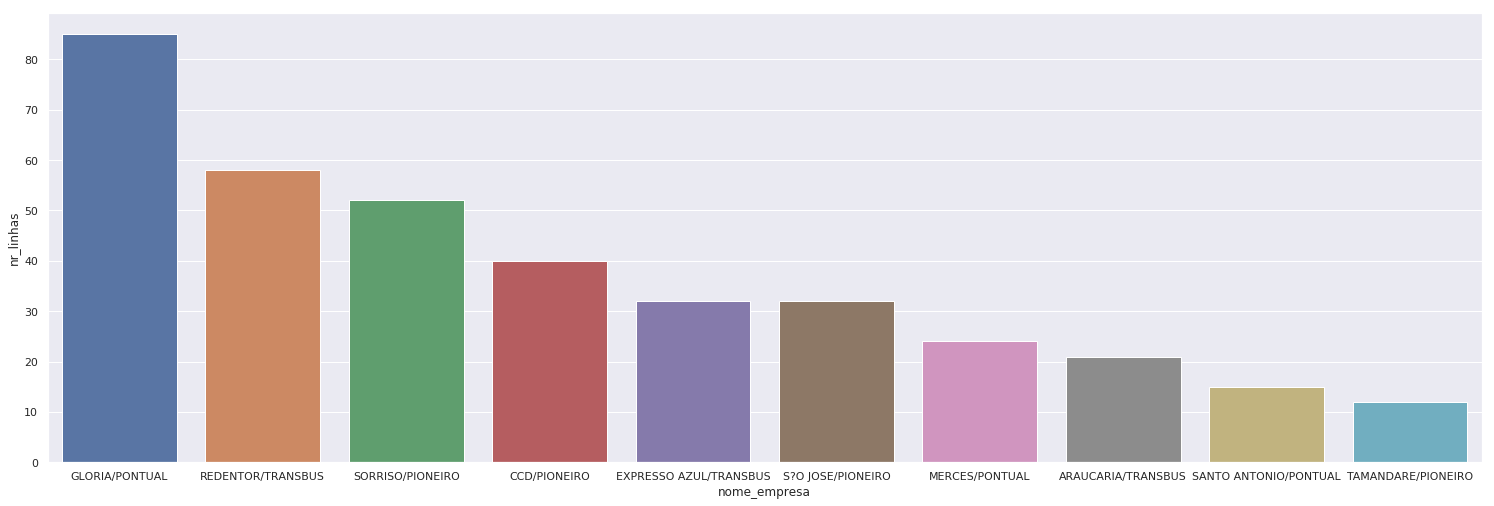

In [25]:
plt.figure(figsize=(25.7,8.27))
sns.barplot(x="nome_empresa", y="nr_linhas", data=linhas_empresa)

In [28]:
query = "select  cat.nome_categoria,emp.nome_empresa,count( distinct li.cod) as qtd_linhas " \
"from trechos_itinerarios ti " \
"inner join categorias_onibus cat on (ti.cod_categoria = cat.cod_categoria) " \
"inner join empresas_onibus emp  on (ti.cod_empresa = emp.cod_empresa) " \
"inner join linhas li on (ti.cod_linha = li.cod and ti.year = li.year  and ti.month = li.month and ti.day = li.day) " \
"where ti.year = '2019' and ti.month = '03' and ti.day = '14' group by cat.nome_categoria,emp.nome_empresa order by qtd_linhas desc"

nr_onibus_categoria_empresa = sqlContext.sql(query).toPandas()

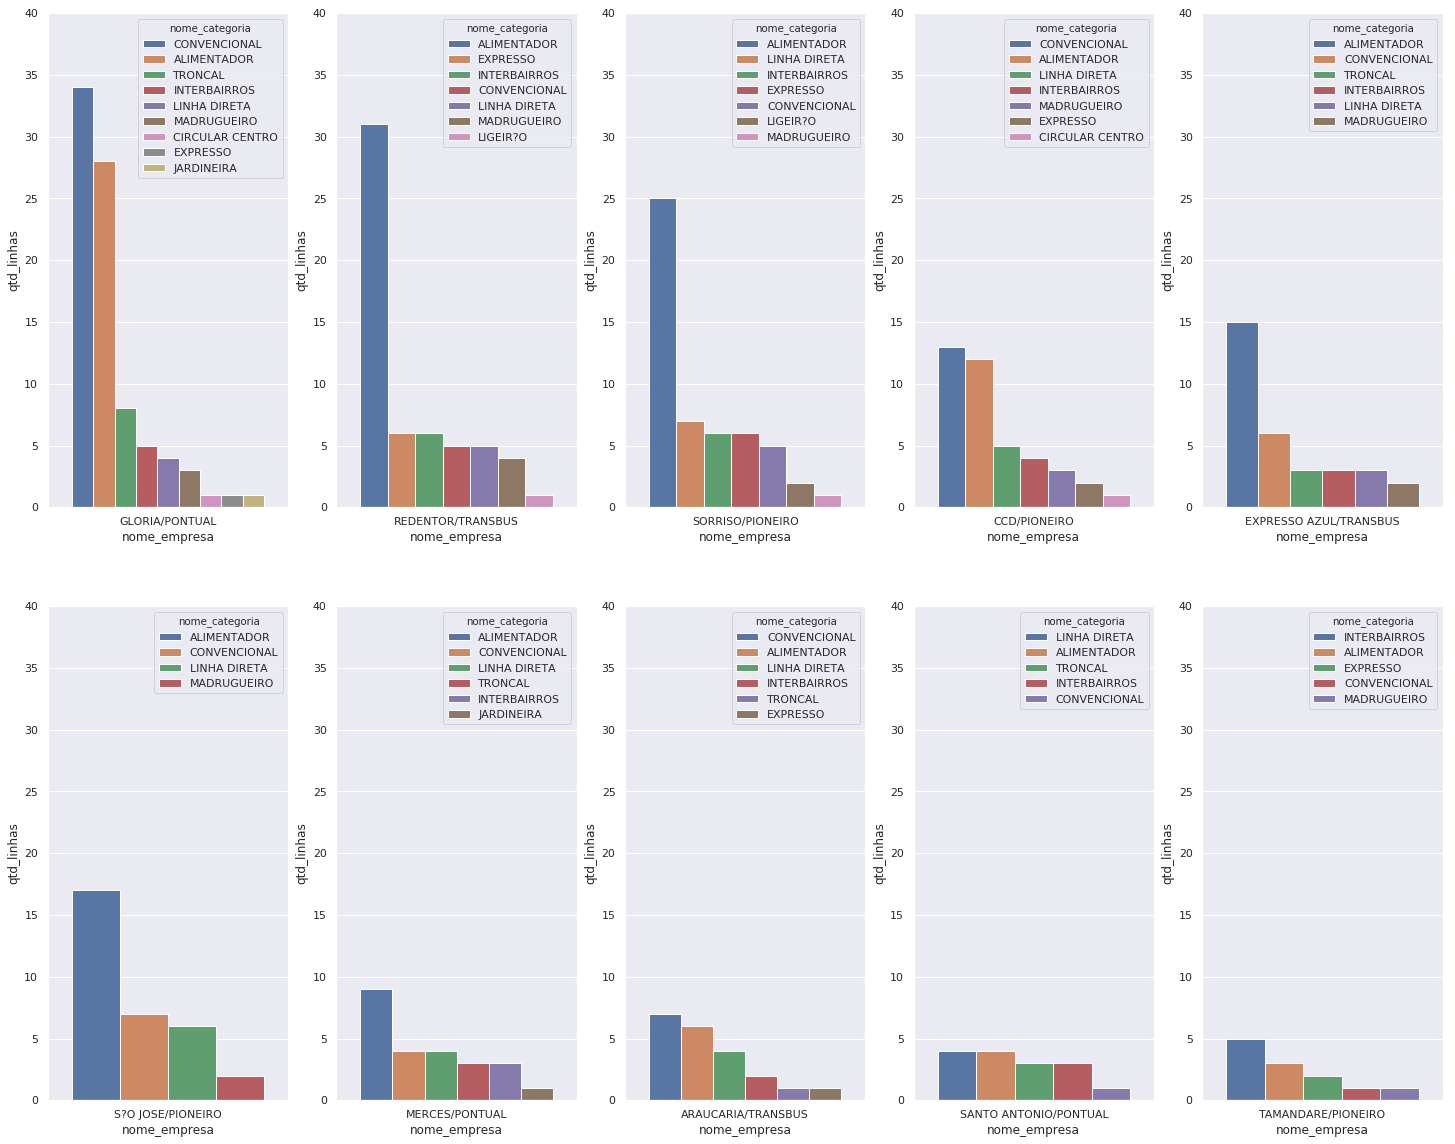

In [29]:
 (fig, ax) = plt.subplots(2,5,figsize=(25,20))

ax[0][0].set(ylim=(0, 40))
ax[0][1].set(ylim=(0, 40))
ax[0][2].set(ylim=(0, 40))
ax[0][3].set(ylim=(0, 40))
ax[0][4].set(ylim=(0, 40))

ax[1][0].set(ylim=(0, 40))
ax[1][1].set(ylim=(0, 40))
ax[1][2].set(ylim=(0, 40))
ax[1][3].set(ylim=(0, 40))
ax[1][4].set(ylim=(0, 40))


sns.barplot(x="nome_empresa", y="qtd_linhas", hue="nome_categoria", data=nr_onibus_categoria_empresa[(nr_onibus_categoria_empresa['nome_empresa']=='GLORIA/PONTUAL')],ax=ax[0][0])
sns.barplot(x="nome_empresa", y="qtd_linhas", hue="nome_categoria", data=nr_onibus_categoria_empresa[(nr_onibus_categoria_empresa['nome_empresa']=='REDENTOR/TRANSBUS')],ax=ax[0][1])
sns.barplot(x="nome_empresa", y="qtd_linhas", hue="nome_categoria", data=nr_onibus_categoria_empresa[(nr_onibus_categoria_empresa['nome_empresa']=='SORRISO/PIONEIRO')],ax=ax[0][2])
sns.barplot(x="nome_empresa", y="qtd_linhas", hue="nome_categoria", data=nr_onibus_categoria_empresa[(nr_onibus_categoria_empresa['nome_empresa']=='CCD/PIONEIRO')],ax=ax[0][3])
sns.barplot(x="nome_empresa", y="qtd_linhas", hue="nome_categoria", data=nr_onibus_categoria_empresa[(nr_onibus_categoria_empresa['nome_empresa']=='EXPRESSO AZUL/TRANSBUS')],ax=ax[0][4])

sns.barplot(x="nome_empresa", y="qtd_linhas", hue="nome_categoria", data=nr_onibus_categoria_empresa[(nr_onibus_categoria_empresa['nome_empresa']=='S?O JOSE/PIONEIRO')],ax=ax[1][0])
sns.barplot(x="nome_empresa", y="qtd_linhas", hue="nome_categoria", data=nr_onibus_categoria_empresa[(nr_onibus_categoria_empresa['nome_empresa']=='MERCES/PONTUAL')],ax=ax[1][1])
sns.barplot(x="nome_empresa", y="qtd_linhas", hue="nome_categoria", data=nr_onibus_categoria_empresa[(nr_onibus_categoria_empresa['nome_empresa']=='ARAUCARIA/TRANSBUS')],ax=ax[1][2])
sns.barplot(x="nome_empresa", y="qtd_linhas", hue="nome_categoria", data=nr_onibus_categoria_empresa[(nr_onibus_categoria_empresa['nome_empresa']=='SANTO ANTONIO/PONTUAL')],ax=ax[1][3])
sns.barplot(x="nome_empresa", y="qtd_linhas", hue="nome_categoria", data=nr_onibus_categoria_empresa[(nr_onibus_categoria_empresa['nome_empresa']=='TAMANDARE/PIONEIRO')],ax=ax[1][4])


##### **Linhas com o maior número de pontos de ônibus**

In [46]:
query = "select  pont.cod,li.nome ,count(distinct pont.num) as qtd_pontos " \
"from pontos_linha pont inner join linhas li on (pont.cod = li.cod and pont.year=li.year and pont.month=li.month and pont.day=li.day) " \
"where li.year = '2019' and li.month='03' and li.day='14' group by pont.cod,li.nome order by qtd_pontos desc"

pontos_linha = sqlContext.sql(query).toPandas()

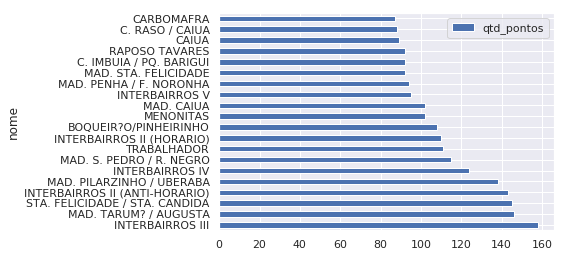

In [47]:
points = pontos_linha.head(20)
points.plot("nome", "qtd_pontos", kind="barh" )

In [48]:
points.head(20)

,cod,nome,qtd_pontos
0,030,INTERBAIRROS III,158
1,389,MAD. TARUM? / AUGUSTA,146
2,924,STA. FELICIDADE / STA. CANDIDA,145
3,021,INTERBAIRROS II (ANTI-HORARIO),143
4,188,MAD. PILARZINHO / UBERABA,138
5,040,INTERBAIRROS IV,124
6,689,MAD. S. PEDRO / R. NEGRO,115
7,545,TRABALHADOR,111
8,020,INTERBAIRROS II (HORARIO),110
9,528,BOQUEIR?O/PINHEIRINHO,108


##### **Breve análise de dados de rastreamento dos ônibus**

In [34]:
query = "select  veic.cod_linha,li.nome, veic.veic,count(distinct veic.dthr) as nr_posicoes " \
"from veiculos veic inner join linhas li on (veic.cod_linha = li.cod) " \
"where TO_DATE(CAST(UNIX_TIMESTAMP(veic.dthr, 'dd/MM/yyyy') AS TIMESTAMP)) = '2019-03-14' group by veic.cod_linha,li.nome,veic.veic "
 
result = sqlContext.sql(query).toPandas()

In [35]:
result.head(10)

,cod_linha,nome,veic,nr_posicoes
0,814,MOSSUNGUE,LA002,376
1,304,PINHAIS / C. COMPRIDO,LL031,1428
2,967,JULIO GRAF,MN605,1370
3,205,BARREIRINHA,BC001,1119
4,821,FERN?O DIAS,MA010,8114
5,011,INTERBAIRROS I (ANTI-HORARIO),BB309,901
6,901,STA. FELICIDADE,MC304,7597
7,967,JULIO GRAF,MN604,5267
8,924,STA. FELICIDADE / STA. CANDIDA,BA013,1830
9,216,CABRAL / PORT?O,BA126,1000


##### **Top 10 ônibus com o maior número de posicionamento e suas respectivas linhas de operação.**

In [36]:
result.sort_values(by=['nr_posicoes'], ascending=False).head(10)

,cod_linha,nome,veic,nr_posicoes
240,924,STA. FELICIDADE / STA. CANDIDA,MA013,11257
258,924,STA. FELICIDADE / STA. CANDIDA,BA140,10718
268,924,STA. FELICIDADE / STA. CANDIDA,MA299,10690
159,243,STA. TEREZINHA,BA115,10666
157,232,ALIANCA,BA133,9578
206,913,BUTIATUVINHA,MN401,9373
98,924,STA. FELICIDADE / STA. CANDIDA,MA007,8790
187,827,RIVIERA,BA037,8493
332,876,SAVOIA,BC016,8481
86,811,SATURNO,BA034,8437


##### **Top 10 ônibus com o menor número de posicionamento e suas respectivas linhas de operação.**

In [37]:
result.sort_values(by=['nr_posicoes'], ascending=True).head(10)

,cod_linha,nome,veic,nr_posicoes
158,809,MAD. CAMPO COMPRIDO,LA851,25
241,307,B. ALTO / STA. FELICIDADE,ML309,84
171,342,B. ALTO / BOA VISTA,BA116,89
298,828,C. COMPRIDO / C. RASO,LC019,227
69,814,MOSSUNGUE,LC298,290
291,207,CABRAL / OSORIO,BC020,307
52,829,UNIV.POSITIVO,BA013,320
132,815,REFORCO TUIUTI,BA112,338
216,815,REFORCO TUIUTI,BA013,355
296,024,C. RASO / CAMP. SIQUEIRA,LL306,368


#### **Análise de frequência de posicionamento do veículo com o menor número de posições.**

In [38]:
query = "select  distinct veic.cod_linha,li.nome, veic.veic, veic.lat,veic.lon, veic.dthr " \
"from veiculos veic inner join linhas li on (veic.cod_linha = li.cod) " \
"where TO_DATE(CAST(UNIX_TIMESTAMP(veic.dthr, 'dd/MM/yyyy') AS TIMESTAMP)) = '2019-03-14' and veic.cod_linha ='809' and veic.veic = 'LA851' order by veic.dthr desc"

result = sqlContext.sql(query).toPandas()

In [39]:
result.head()

,cod_linha,nome,veic,lat,lon,dthr
0,809,MAD. CAMPO COMPRIDO,LA851,-25.447875,-49.353751,14/03/2019 23:59:58
1,809,MAD. CAMPO COMPRIDO,LA851,-25.448133,-49.353606,14/03/2019 23:59:55
2,809,MAD. CAMPO COMPRIDO,LA851,-25.448786,-49.353695,14/03/2019 23:59:47
3,809,MAD. CAMPO COMPRIDO,LA851,-25.449068,-49.353785,14/03/2019 23:59:43
4,809,MAD. CAMPO COMPRIDO,LA851,-25.449363,-49.353788,14/03/2019 23:59:39


Aparentemente o veículo está apresentando uma frequência de posicionamento menor que 10 seguntos.   
Suficiente para análises posteriores.

#### **Análise de frequência de posicionamento do veículo com o maior número de posições.**

In [40]:
query = "select  distinct veic.cod_linha,li.nome, veic.veic,veic.lat,veic.lon,veic.dthr " \
"from veiculos veic inner join linhas li on (veic.cod_linha = li.cod) " \
"where TO_DATE(CAST(UNIX_TIMESTAMP(veic.dthr, 'dd/MM/yyyy') AS TIMESTAMP)) = '2019-03-14' and veic.cod_linha ='924' and veic.veic = 'MA013' order by veic.dthr desc"

result = sqlContext.sql(query).toPandas()

In [41]:
result.head()

,cod_linha,nome,veic,lat,lon,dthr
0,924,STA. FELICIDADE / STA. CANDIDA,MA013,-25.393596,-49.293065,14/03/2019 23:59:55
1,924,STA. FELICIDADE / STA. CANDIDA,MA013,-25.393545,-49.293738,14/03/2019 23:59:46
2,924,STA. FELICIDADE / STA. CANDIDA,MA013,-25.393528,-49.294051,14/03/2019 23:59:42
3,924,STA. FELICIDADE / STA. CANDIDA,MA013,-25.393548,-49.294306,14/03/2019 23:59:39
4,924,STA. FELICIDADE / STA. CANDIDA,MA013,-25.393605,-49.29467,14/03/2019 23:59:34


Aparentemente o veículo também está apresentando uma frequência de posicionamento menor que 10 seguntos.   
Suficiente para análises posteriores.

#### **4. Conclusões/ideias/hipóteses iniciais**

Através desta breve análise exploratória dos dados fonecidos pela URBS pode-se analisar os dados de maior importância, assim como a qualidade dos mesmos.   
Como passos futuros será iniciado a criação da base de dados para análise de link stream para detecção de padrões de bus bunching utilizando o Neo4J.